<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [110]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

with open("m4_survey_data.sqlite", "wb") as f:
    f.write(response.content)

print("File successfully downloaded")

File successfully downloaded


In [34]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [111]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [112]:
import pandas as pd

## Demo: How to run an sql query


In [113]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [114]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [115]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [116]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [117]:
# your code goes here
QUERY = """
SELECT ConvertedComp 
FROM master
"""

df_CC = pd.read_sql_query(QUERY,conn)
df_CC.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


In [42]:
# QUERY = """
# SELECT * 
# FROM master
# """

# df_all = pd.read_sql_query(QUERY,conn)
# df_all.head()

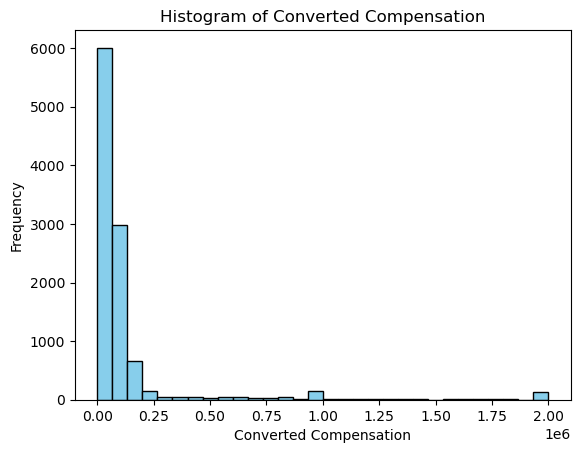

In [118]:
import matplotlib.pyplot as plt
 
plt.hist(df_CC, bins=30, color='skyblue', edgecolor='black')
 
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
 
plt.show()


### Box Plots


Plot a box plot of `Age.`


In [119]:
# your code goes here
QUERY = """
SELECT Age 
FROM master
"""

df_Age = pd.read_sql_query(QUERY,conn)
df_Age.head()


,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


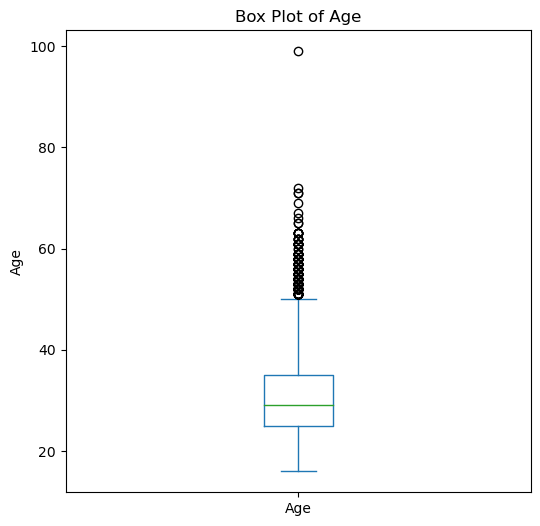

In [120]:
df_Age.plot(kind='box', figsize=(6, 6))

plt.title('Box Plot of Age')
plt.ylabel('Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [121]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs 
FROM master
"""

df_AgeWWH = pd.read_sql_query(QUERY,conn)
df_AgeWWH.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


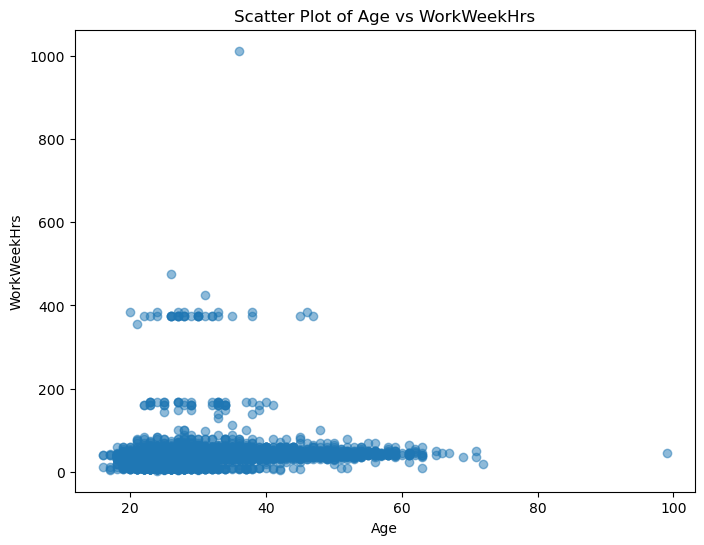

In [122]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_AgeWWH['Age'], df_AgeWWH['WorkWeekHrs'], alpha=0.5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age vs WorkWeekHrs')

# Show plot
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [123]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, Age, CodeRevHrs  
FROM master
"""

df_Bub = pd.read_sql_query(QUERY,conn)
df_Bub.head()

,WorkWeekHrs,Age,CodeRevHrs
0,80.0,22.0,NaN
1,32.0,23.0,12.0
2,40.0,28.0,5.0
3,40.0,26.0,NaN
4,45.0,29.0,5.0


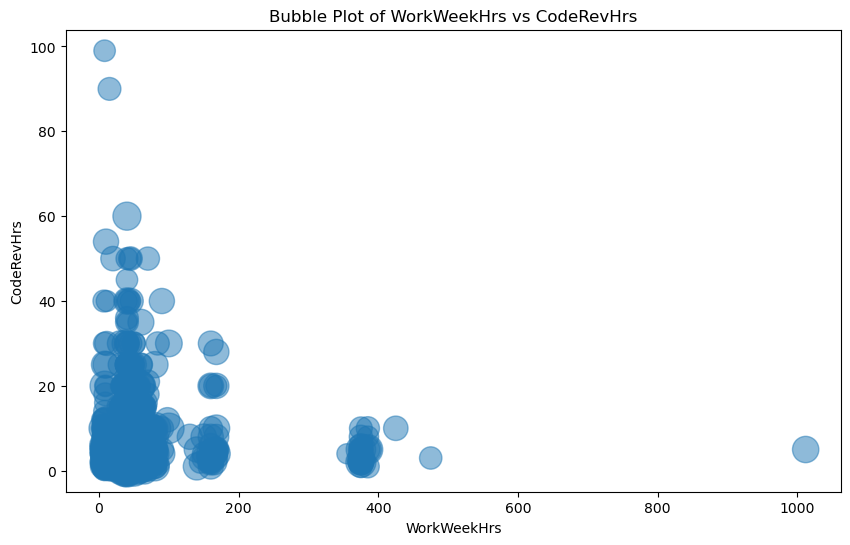

In [49]:
bubble_size = df_Bub['Age']

plt.figure(figsize=(10, 6))
plt.scatter(df_Bub['WorkWeekHrs'], df_Bub['CodeRevHrs'], s=bubble_size*10, alpha=0.5)
 
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
 
plt.show()

In [50]:
df_Bub['Age'].isnull().sum()

287

In [51]:
df_Bub['Age'] = df_Bub['Age'].fillna(df_Bub['Age'].median())

In [52]:
import plotly
import plotly.express as px

## Bubble chart using px.scatter function with x ,y and size varibles defined.Title defined as Age
fig = px.scatter(df_Bub, x="WorkWeekHrs", y="CodeRevHrs", size="Age",
                 hover_name="Age", title='Bubble Plot of WorkWeekHrs vs CodeRevHrs', size_max=60)
fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [124]:
# your code goes here
QUERY = """
SELECT * FROM
DatabaseDesireNextYear
"""
df_pie = pd.read_sql_query(QUERY,conn)
df_pie.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [126]:
df_pie1 = df_pie.groupby('DatabaseDesireNextYear').count().reset_index()

df_pie1 = df_pie1.sort_values(by='Respondent', ascending=False).head(5)
df_pie1

,DatabaseDesireNextYear,Respondent
11,PostgreSQL,4328
7,MongoDB,3649
12,Redis,3331
8,MySQL,3281
3,Elasticsearch,2856


In [127]:
fig = px.pie(df_pie1, values='Respondent', names='DatabaseDesireNextYear', title='Top 5 databases that respondents wish to learn next year', height=600, width=800)
fig.show()

In [200]:
#Question 4 How many respondents indicated that they work on 'MySQL' only? 

QUERY = """
SELECT * FROM
DatabaseWorkedWith
"""
df_DBWW= pd.read_sql_query(QUERY,conn)
df_DBWW.head()

df_OMS = df_DBWW.groupby('Respondent').sum().reset_index()
(df_OMS['DatabaseWorkedWith'] == 'MySQL').sum()

474

In [135]:
QUERY = """
SELECT * FROM
LanguageDesireNextYear
"""
df_L = pd.read_sql_query(QUERY,conn)
df_L.head()

df_L = df_L.groupby('LanguageDesireNextYear').count().reset_index()

df_L = df_L.sort_values(by='Respondent', ascending=False).head(5)

fig = px.pie(df_L, values='Respondent', names='LanguageDesireNextYear', title='Top 5 languages that respondents wish to learn next year', height=600, width=800)
fig.show()

In [170]:
QUERY = """
SELECT * FROM
LanguageWorkedWith
"""
df_L = pd.read_sql_query(QUERY,conn)
df_L.head()

df_L = df_L.groupby('LanguageWorkedWith').count().reset_index()

df_L5 = df_L.sort_values(by='Respondent', ascending=False).head(5)

fig = px.pie(df_L5, values='Respondent', names='LanguageWorkedWith', title='Top 5 languages that respondents worked with', height=600, width=800)
fig.update_traces(textinfo='value+percent')
fig.show()

In [174]:
df_L.sort_values(by='Respondent', ascending=False)

,LanguageWorkedWith,Respondent
13,JavaScript,8687
11,HTML/CSS,7830
22,SQL,7106
1,Bash/Shell/PowerShell,4642
18,Python,4542
12,Java,4506
3,C#,4288
25,TypeScript,3232
17,PHP,2913
4,C++,1946


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [75]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df_SC = pd.read_sql_query(QUERY,conn)
df_SC.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


In [76]:
df_filtered = df_SC[(df_SC['Age'] >= 30) & (df_SC['Age'] <= 35)]

median_data = df_filtered.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median().reset_index()
 
fig = px.bar(median_data, x='Age', y=['WorkWeekHrs', 'CodeRevHrs'], 
             title='Median WorkWeekHrs and CodeRevHrs for Age Group 30-35',
             labels={'value': 'Median Hours', 'variable': 'Activity'},
             barmode='stack')
   
fig.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [80]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
"""

df_LC = pd.read_sql_query(QUERY,conn)
df_LC.head()

,Age,ConvertedComp
0,22.0,61000.0
1,23.0,95179.0
2,28.0,90000.0
3,26.0,455352.0
4,29.0,65277.0


In [89]:
# your code goes here
df_45_60 = df_LC[(df_LC['Age'] >= 45) & (df_LC['Age'] <= 60)]

df_LC_med = df_45_60.groupby('Age')['ConvertedComp'].median().reset_index()
 
fig = px.line(df_LC_med, x='Age', y='ConvertedComp', 
             title='Median ConvertedComp for Ages 45-60',
             labels={'ConvertedComp': 'Median ConvertedComp', 'Age': 'Age'})
fig.show()

In [205]:
# 2.
# Question 2
# Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 
df_25_30 = df_LC[(df_LC['Age'] >= 25) & (df_LC['Age'] <= 30)]

df_2 = df_25_30.groupby('Age')['ConvertedComp'].median().reset_index()
 
fig = px.line(df_2, x='Age', y='ConvertedComp', 
             title='Median ConvertedComp for Ages 25-30',
             labels={'ConvertedComp': 'Median ConvertedComp', 'Age': 'Age'})
fig.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [105]:
# your code goes here
QUERY = """
SELECT Respondent, MainBranch
FROM master
"""

df_MB = pd.read_sql_query(QUERY,conn)
df_MB.head()

,Respondent,MainBranch
0,4,I am a developer by profession
1,9,I am a developer by profession
2,13,I am a developer by profession
3,16,I am a developer by profession
4,17,I am a developer by profession


In [106]:
df_MB1 = df_MB.groupby('MainBranch').count().reset_index()
df_MB1

,MainBranch,Respondent
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


In [108]:
fig = px.bar(df_MB1, x = 'MainBranch', y = 'Respondent', 
             title = 'Main Branch of Respondents',
             labels={'Respondent': 'Number of Respondents', 'MainBranch': 'Main Branch'})

fig.show()

In [204]:
# 1.
# Question 1
# Majority of the survey responders are
QUERY = """
SELECT *
FROM DevType
"""

df_Q = pd.read_sql_query(QUERY,conn)
df_Q.head()

df_Q['DevType'].value_counts()

DevType
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or g

Close the database connection.


In [109]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
